In [42]:
################# importing necessary packages and modules #####################
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

In [43]:
############### reading the data - ############################################

dataset = pd.read_csv("casualty_classification.csv")

In [4]:
dataset.shape

(7616, 11)

In [5]:
dataset.head()

,road_type,speed_limit,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,carriageway_hazards,urban_or_rural_area,trunk_road_flag,accident_severity
0,2,30,0,4,4,1,1,0,1,2,1
1,3,20,0,1,4,8,2,0,1,2,1
2,2,20,0,4,1,1,2,0,1,2,1
3,6,30,0,5,5,1,2,0,1,2,1
4,3,30,0,0,4,2,2,2,2,2,1


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7616 entries, 0 to 7615
Data columns (total 11 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   road_type                                7616 non-null   int64
 1   speed_limit                              7616 non-null   int64
 2   pedestrian_crossing_human_control        7616 non-null   int64
 3   pedestrian_crossing_physical_facilities  7616 non-null   int64
 4   light_conditions                         7616 non-null   int64
 5   weather_conditions                       7616 non-null   int64
 6   road_surface_conditions                  7616 non-null   int64
 7   carriageway_hazards                      7616 non-null   int64
 8   urban_or_rural_area                      7616 non-null   int64
 9   trunk_road_flag                          7616 non-null   int64
 10  accident_severity                        7616 non-null   int64
dtypes: i

In [7]:
dataset.head()

,road_type,speed_limit,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,carriageway_hazards,urban_or_rural_area,trunk_road_flag,accident_severity
0,2,30,0,4,4,1,1,0,1,2,1
1,3,20,0,1,4,8,2,0,1,2,1
2,2,20,0,4,1,1,2,0,1,2,1
3,6,30,0,5,5,1,2,0,1,2,1
4,3,30,0,0,4,2,2,2,2,2,1


In [8]:
dataset.describe()

,road_type,speed_limit,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,carriageway_hazards,urban_or_rural_area,trunk_road_flag,accident_severity
count,7616.000000,7616.000000,7616.000000,7616.000000,7616.000000,7616.000000,7616.000000,7616.000000,7616.000000,7616.000000,7616.000000
mean,5.226234,32.544643,0.615678,1.740809,2.326287,1.710215,1.456933,0.298976,1.198398,1.878020,1.939338
std,1.718968,13.360425,2.203265,2.797437,1.815168,1.875559,1.166048,1.498620,0.399149,0.529582,0.646418
min,1.000000,20.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,1.000000
25%,3.000000,20.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,2.000000
50%,6.000000,30.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,2.000000
75%,6.000000,30.000000,0.000000,4.000000,4.000000,1.000000,2.000000,0.000000,1.000000,2.000000,2.000000
max,9.000000,70.000000,9.000000,9.000000,7.000000,9.000000,9.000000,9.000000,3.000000,2.000000,3.000000


In [9]:
############### defining input variables and the target label  ###################

X = dataset.drop(["accident_severity"], axis=1)
y = dataset.accident_severity

In [10]:
#############  splitting dataset into train-test at ratio 4:1  #############

from sklearn.model_selection import train_test_split
X_trained, X_tested, y_train, y_test =train_test_split(X, y, test_size =0.2, random_state = 0)

In [13]:
###########  to standardise the data before training  ######################

from sklearn.preprocessing import StandardScaler
Scaler_X = StandardScaler()
X_train =Scaler_X.fit_transform(X_trained)
X_test =Scaler_X.transform(X_tested)

In [14]:
sev = dataset["accident_severity"].value_counts()
print(sev)

2    4406
1    1836
3    1374
Name: accident_severity, dtype: int64


In [15]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(6092, 10)
(1524, 10)
(6092,)
(1524,)


In [16]:
###   Applying multinomial logistic regression model to trained dataset ####

classifier = LogisticRegression(multi_class='multinomial', class_weight = "balanced")

In [17]:
############### fit the model on the trained dataset #######################

classifier.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', multi_class='multinomial')

In [18]:
################  Predicting the outcome of the model  ###################

y_pred = classifier.predict(X_test)


In [41]:
################ Using in-built accuracy report to valuate the performance of the classification model ############

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_pred, y_test)
print('Accuracy score: %.2f' %accuracy)

Accuracy score: 0.59


              precision    recall  f1-score   support

           1       0.69      0.67      0.68       365
           2       0.73      0.55      0.63       879
           3       0.34      0.62      0.44       280

    accuracy                           0.59      1524
   macro avg       0.59      0.61      0.58      1524
weighted avg       0.65      0.59      0.61      1524



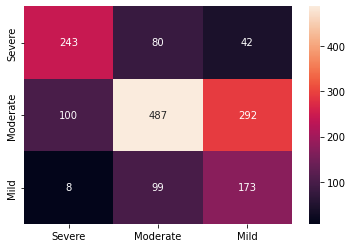

In [44]:
########## visualising the performance of the model at a glance #####

from sklearn.metrics import classification_report, confusion_matrix
# Adding classes names for better interpretation
classes_names = ['Severe','Moderate','Mild']
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), 
columns=classes_names, index = classes_names)
                  
# Seaborn's heatmap to better visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d');

print(classification_report(y_test, y_pred))

In [32]:
###   Applying regularisatio strength to the multinomial logistic regression model  ####

classifier2 = LogisticRegression(multi_class='multinomial', class_weight = "balanced", C= 0.005)

In [45]:
classifier2.fit(X_train, y_train)

LogisticRegression(C=0.005, class_weight='balanced', multi_class='multinomial')

In [ ]:
y_pred2 = classifier2.predict(X_test)

In [40]:
################ Using in-built accuracy report to valuate the performance of the classification model ############

from sklearn.metrics import accuracy_score
accuracy2 = accuracy_score(y_pred2, y_test)
print('Improved Accuracy score: %.2f' %accuracy2)

Improved Accuracy score: 0.61


              precision    recall  f1-score   support

           1       0.70      0.66      0.68       365
           2       0.74      0.59      0.66       879
           3       0.35      0.58      0.43       280

    accuracy                           0.61      1524
   macro avg       0.59      0.61      0.59      1524
weighted avg       0.66      0.61      0.62      1524



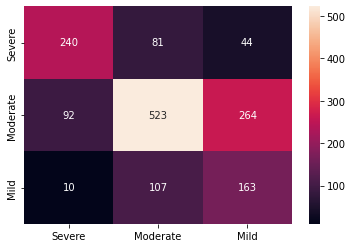

In [31]:
########## visualising the performance of the model at a glance #####

from sklearn.metrics import classification_report, confusion_matrix
# Adding classes names for better interpretation
classes_names = ['Severe','Moderate','Mild']
cm = pd.DataFrame(confusion_matrix(y_test, y_pred2), 
columns=classes_names, index = classes_names)
                  
# Seaborn's heatmap to better visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d');

print(classification_report(y_test, y_pred2))